
### IMPORTING LIBRARIES AND DATASET 

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### EDA

In [91]:
x_train.shape

(60000, 28, 28)

In [92]:
image = x_train[12]

In [93]:
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  12,  99,  91, 142, 155, 246, 182, 155, 155, 155,
        155, 131,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### PreProcessing Data


In [94]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [95]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [96]:
y_train.shape

(60000,)

In [97]:
y_sample = to_categorical(y_train)

In [98]:
y_sample

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [99]:
y_sample.shape

(60000, 10)

In [100]:
y_sample[12]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [101]:
y_cat_test = to_categorical(y_test,10)

In [102]:
y_cat_train = to_categorical(y_train,10)

### FEATURE SCALING

In [103]:
image.max()

255

In [104]:
image.min()

0

In [105]:
x_train = x_train/255
x_test = x_test/255

In [106]:
scaled_single = x_train[0]

In [107]:
scaled_single.max()

1.0

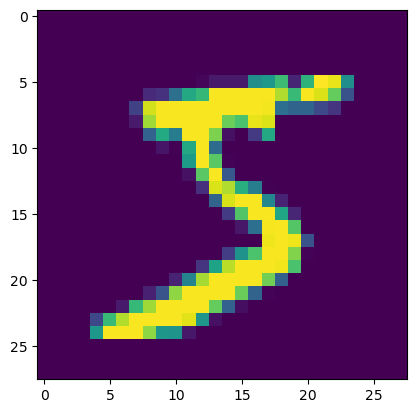

In [108]:
plt.imshow(scaled_single)

### Reshaping the Data

In [109]:
x_train.shape

(60000, 28, 28)

In [110]:
x_test.shape

(10000, 28, 28)

In [111]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [112]:
x_train.shape

(60000, 28, 28, 1)

In [113]:
x_test = x_test.reshape(10000,28,28,1)

In [114]:
x_test.shape

(10000, 28, 28, 1)

### Model Building

In [115]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128, activation='relu'))


model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [116]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               589952    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [117]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Train the Model

In [118]:
model.fit(x_train,y_cat_train,epochs=3,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/3
1875/1875 [==============================] - 56s 29ms/step - loss: 0.1369 - accuracy: 0.9596 - val_loss: 0.0521 - val_accuracy: 0.9842
Epoch 2/3
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0487 - accuracy: 0.9850 - val_loss: 0.0425 - val_accuracy: 0.9861
Epoch 3/3
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0302 - accuracy: 0.9909 - val_loss: 0.0376 - val_accuracy: 0.9878


### Evaluating The Modal

In [119]:
model.metrics_names

['loss', 'accuracy']

In [120]:
losses = pd.DataFrame(model.history.history)

In [121]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.136915,0.959567,0.052114,0.9842
1,0.048673,0.984967,0.042464,0.9861
2,0.030177,0.990867,0.037588,0.9878


<Axes: >

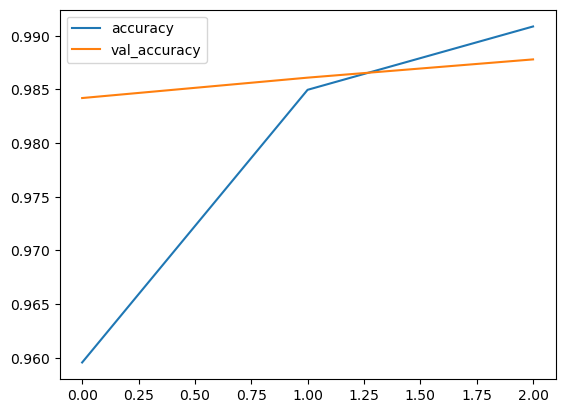

In [122]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

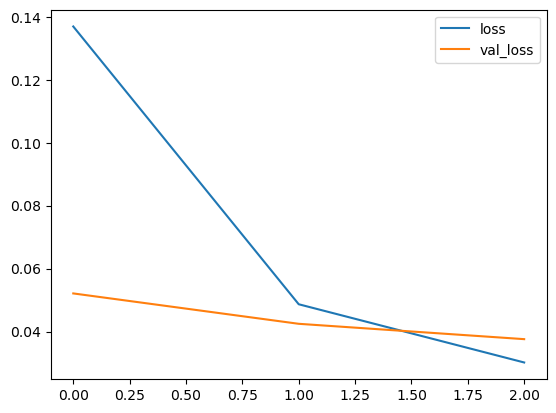

In [123]:
losses[['loss','val_loss']].plot()

In [124]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.03758801519870758, 0.9878000020980835]


In [125]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 2s 6ms/step


In [126]:
y_cat_test.shape

(10000, 10)

In [127]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [128]:
classes_x[0]

7

In [129]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [130]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [131]:
confusion_matrix(y_test,classes_x)

array([[ 976,    0,    0,    0,    0,    0,    2,    1,    1,    0],
       [   0, 1133,    0,    0,    0,    0,    2,    0,    0,    0],
       [   1,    3, 1018,    0,    1,    0,    2,    3,    4,    0],
       [   0,    0,    4, 1001,    0,    2,    1,    0,    2,    0],
       [   0,    0,    0,    0,  975,    0,    3,    0,    0,    4],
       [   2,    0,    0,    4,    0,  884,    2,    0,    0,    0],
       [   5,    1,    1,    0,    1,    2,  948,    0,    0,    0],
       [   0,    2,    8,    1,    0,    0,    0, 1009,    1,    7],
       [   9,    0,    1,    2,    0,    5,    4,    1,  950,    2],
       [   3,    1,    0,    1,    9,    3,    0,    5,    3,  984]],
      dtype=int64)

### TESTING

In [132]:
testing_number = x_test[5]

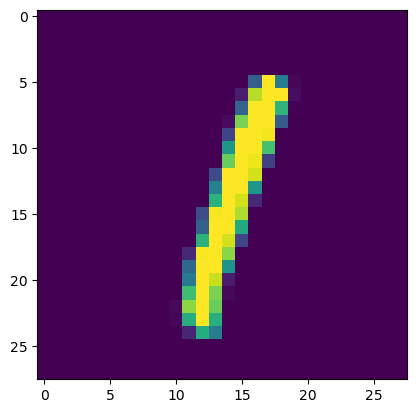

In [133]:
plt.imshow(testing_number.reshape(28,28))

In [134]:
predict_x=model.predict(testing_number.reshape(1,28,28,1)) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

1/1 [==============================] - 0s 40ms/step


array([1], dtype=int64)